Montar a Gooogle Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importas Librerías

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

Cargar ambas hojas

In [0]:
sales_xlsx_box = pd.read_excel('Sales.xlsx', sheet_name= 'BOX')

In [0]:
sales_xlsx_box.head()

,CTY,RID,2019/03/01,2019/03/02,2019/03/04,2019/03/05,2019/03/06,2019/03/07,2019/03/08,2019/03/09,2019/03/11,2019/03/12,2019/03/13,2019/03/14,2019/03/15,2019/03/16,2019/03/18,2019/03/19,2019/03/20,2019/03/21,2019/03/22,2019/03/23,2019/03/25,2019/03/26,2019/03/27,2019/03/28,2019/03/29,2019/03/30,2019/04/01,2019/04/02,2019/04/03,2019/04/04,2019/04/05,2019/04/06,2019/04/08,2019/04/09,2019/04/10,2019/04/11,2019/04/12,2019/04/13,...,2020/01/17.3,2020/01/18.3,2020/01/20.3,2020/01/21.3,2020/01/22.3,2020/01/23.3,2020/01/24.3,2020/01/25.3,2020/01/27.3,2020/01/28.3,2020/01/29.3,2020/01/30.3,2020/01/31.3,2020/02/01.3,2020/02/03.3,2020/02/04.3,2020/02/05.3,2020/02/06.3,2020/02/07.3,2020/02/08.3,2020/02/10.3,2020/02/11.3,2020/02/12.3,2020/02/13.3,2020/02/14.3,2020/02/15.3,2020/02/17.3,2020/02/18.3,2020/02/19.3,2020/02/20.3,2020/02/21.3,2020/02/22.3,2020/02/24.3,2020/02/25.3,2020/02/26.3,2020/02/27.3,2020/02/28.3,2020/02/29.3,#TRANS_L12Mo,#UNITS_L12Mo
0,Argentina,132759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
1,Argentina,135563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7
2,Argentina,141357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,Argentina,379800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
4,Argentina,379814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [0]:
sales_xlsx_ol = pd.read_excel('Sales.xlsx', sheet_name= 'OL')

In [4]:
sales_xlsx_ol.head()

,CTY,RID,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,...,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1,#TRANS_L12Mo,#UNITS_L12Mo
0,Argentina,116370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,44
1,Argentina,116504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,Argentina,116512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,Argentina,116921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Argentina,125563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,11


In [0]:
sales_xlsx_box.info(), sales_xlsx_ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Columns: 1042 entries, CTY to #UNITS_L12Mo
dtypes: float64(519), int64(522), object(1)
memory usage: 39.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8459 entries, 0 to 8458
Columns: 1046 entries, CTY to #UNITS_L12Mo
dtypes: float64(521), int64(524), object(1)
memory usage: 67.5+ MB


(None, None)

Transformar Ventas Online a CSV

In [0]:
sales_xlsx_ol.to_csv(r'/content/Sales_ol.csv', index = False,  )

In [0]:
sales_ol = pd.read_csv('Sales_ol.csv')

In [9]:
sales_ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8459 entries, 0 to 8458
Columns: 1046 entries, CTY to #UNITS_L12Mo
dtypes: float64(521), int64(524), object(1)
memory usage: 67.5+ MB


In [71]:
sales_ol.tail()

,CTY,RID,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,...,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1,#TRANS_L12Mo,#UNITS_L12Mo
8454,South Region LATAM,65033436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
8455,South Region LATAM,65078051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,25
8456,South Region LATAM,65248960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8457,South Region LATAM,65248961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8458,South Region LATAM,65248963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Buscar Nulls o NaNs

In [5]:
sales_ol.isna().any().sum(), sales_ol.isnull().any().sum()

(521, 521)

Remplazar NaNs con Ceros

In [0]:
sales_ol = sales_ol.replace(np.nan,0)

Buscar Duplicados

In [7]:
sales_ol.duplicated().sum()

0

Buscar espacios en blanco

In [8]:
sales_ol_filter = sales_ol == " "
sales_ol_filter.any().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

In [9]:
sales_ol.isna().any().sum(), sales_ol.isnull().any().sum()

(0, 0)

In [10]:
sales_ol.shape

(8459, 1046)

In [74]:
sales_ol.describe()

,RID,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,2018/08/14,...,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1,#TRANS_L12Mo,#UNITS_L12Mo
count,8.459000e+03,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,...,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000
mean,3.796583e+07,0.004492,0.008985,0.014186,0.011231,0.015132,0.000118,0.008157,0.020688,0.017733,0.019742,0.021397,0.000118,0.000118,0.015132,0.013713,0.016669,0.042676,0.023643,0.013595,0.050006,0.024353,0.052370,0.030382,0.000118,0.000828,0.022107,0.079797,0.015014,0.012767,0.021516,0.021161,0.015014,0.070221,0.031800,0.023525,0.001891,0.000118,0.017260,0.016196,...,0.000236,0.010876,0.010403,0.010994,0.012767,0.011822,0.000118,0.009339,0.011940,0.011704,0.013950,0.016669,0.000118,0.009576,0.007566,0.008630,0.012176,0.010285,0.000118,0.008157,0.011940,0.011112,0.011231,0.011112,0.000236,0.000118,0.008866,0.013477,0.009221,0.013359,0.014423,0.000118,0.005911,0.005438,0.009339,0.011585,0.017733,0.001773,2.669346,19.264688
std,1.987851e+07,0.127655,0.306645,0.394197,0.380715,0.439273,0.010873,0.917786,0.778599,0.442127,0.647649,0.734831,0.010873,0.010873,0.639600,0.336972,0.433664,2.500404,0.741570,0.316534,1.906041,1.581363,2.667022,0.875374,0.010873,0.076109,0.789568,2.721553,0.376210,0.408676,0.551453,0.757965,0.358509,4.384541,1.209955,0.582547,0.173964,0.010873,0.606721,0.392767,...,0.015376,0.103725,0.101470,0.104281,0.112276,0.108090,0.010873,0.096193,0.108622,0.107554,0.117289,0.128034,0.010873,0.097391,0.086658,0.092501,0.109679,0.100898,0.010873,0.089952,0.108622,0.104834,0.105384,0.104834,0.015376,0.010873,0.093748,0.115311,0.095588,0.114811,0.119232,0.010873,0.076659,0.073546,0.096193,0.107016,0.131986,0.042075,6.706337,158.418405
min,1.163700e+05,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,-65.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000,-98.000000,0.000000,-1.000000,0.000000,0.000000,-10.000000,-1.000000,0.000000,-5.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Quitamos las ciudades y el distribuidor

In [0]:
sales_ol_only = sales_ol.drop('RID', axis=1)

In [0]:
 sales_ol_only = sales_ol_only.drop('CTY', axis=1) 

In [0]:
 sales_ol_only = sales_ol_only.drop('#UNITS_L12Mo', axis=1)

In [0]:
 sales_ol_only = sales_ol_only.drop('#TRANS_L12Mo', axis=1) 

Igualamos devoluciones a cero

In [11]:
 sales_ol_only[sales_ol_only < 0] = 0
 sales_ol_only.describe()

,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,2018/08/14,2018/08/15,...,2020/01/16.1,2020/01/17.1,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1
count,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,...,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000,8459.000000
mean,0.004492,0.008985,0.014541,0.011231,0.015132,0.000118,0.015841,0.020688,0.017851,0.019861,0.021397,0.000118,0.000118,0.015132,0.013713,0.016905,0.042676,0.023643,0.013831,0.050006,0.035938,0.052370,0.030500,0.000118,0.000828,0.023289,0.079915,0.015014,0.013359,0.021516,0.023525,0.015014,0.070221,0.031800,0.025180,0.001891,0.000118,0.017260,0.016196,0.011467,...,0.011704,0.011231,0.000236,0.010876,0.010403,0.010994,0.012767,0.011822,0.000118,0.009339,0.011940,0.011704,0.013950,0.016669,0.000118,0.009576,0.007566,0.008630,0.012176,0.010285,0.000118,0.008157,0.011940,0.011112,0.011231,0.011112,0.000236,0.000118,0.008866,0.013477,0.009221,0.013359,0.014423,0.000118,0.005911,0.005438,0.009339,0.011585,0.017733,0.001773
std,0.127655,0.306645,0.392832,0.380715,0.439273,0.010873,0.585337,0.778599,0.441989,0.647554,0.734831,0.010873,0.010873,0.639600,0.336972,0.433109,2.500404,0.741570,0.315775,1.906041,1.168125,2.667022,0.875302,0.010873,0.076109,0.782011,2.721528,0.376210,0.405024,0.551453,0.726025,0.358509,4.384541,1.209955,0.562234,0.173964,0.010873,0.606721,0.392767,0.274624,...,0.107554,0.105384,0.015376,0.103725,0.101470,0.104281,0.112276,0.108090,0.010873,0.096193,0.108622,0.107554,0.117289,0.128034,0.010873,0.097391,0.086658,0.092501,0.109679,0.100898,0.010873,0.089952,0.108622,0.104834,0.105384,0.104834,0.015376,0.010873,0.093748,0.115311,0.095588,0.114811,0.119232,0.010873,0.076659,0.073546,0.096193,0.107016,0.131986,0.042075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [33]:
sales_ol_only.shape

(8459, 1042)

In [34]:
sales_ol_only.T 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8419,8420,8421,8422,8423,8424,8425,8426,8427,8428,8429,8430,8431,8432,8433,8434,8435,8436,8437,8438,8439,8440,8441,8442,8443,8444,8445,8446,8447,8448,8449,8450,8451,8452,8453,8454,8455,8456,8457,8458
2018/07/02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/02/25.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020/02/26.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020/02/27.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2020/02/28.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Graficamos

In [0]:
rcParams['figure.figsize'] = 15,10

 ...]

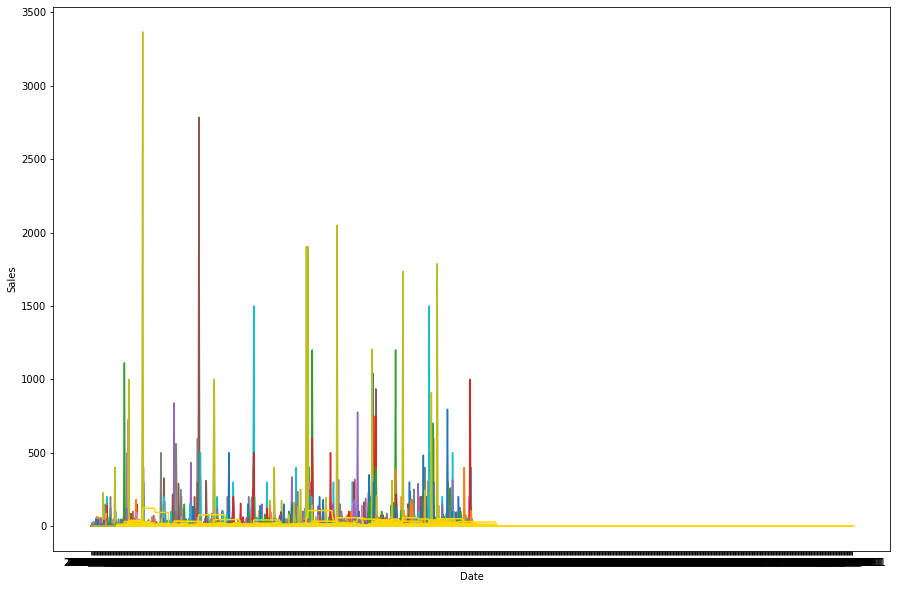

In [37]:
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(sales_ol_only.T)
#plt.plot(rolmean, color="black", label='Rolling Mean')

Media Móvil

In [36]:
rolmean = sales_ol_only.T.rolling(window = 36).mean()
rolstd = sales_ol_only.T.rolling(window = 36).std()
print(rolmean, rolstd)

              0     1     2     3     ...      8455  8456  8457  8458
2018/07/02     NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN
2018/07/03     NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN
2018/07/04     NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN
2018/07/05     NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN
2018/07/06     NaN   NaN   NaN   NaN  ...       NaN   NaN   NaN   NaN
...            ...   ...   ...   ...  ...       ...   ...   ...   ...
2020/02/25.1   0.0   0.0   0.0   0.0  ...  0.000000   0.0   0.0   0.0
2020/02/26.1   0.0   0.0   0.0   0.0  ...  0.000000   0.0   0.0   0.0
2020/02/27.1   0.0   0.0   0.0   0.0  ...  0.027778   0.0   0.0   0.0
2020/02/28.1   0.0   0.0   0.0   0.0  ...  0.027778   0.0   0.0   0.0
2020/02/29.1   0.0   0.0   0.0   0.0  ...  0.027778   0.0   0.0   0.0

[1042 rows x 8459 columns]               0     1     2             3     ...      8455  8456  8457  8458
2018/07/02     NaN   NaN   NaN           NaN  ...     

Pruebas de Hipótesis

In [0]:
from statsmodels.tsa.stattools import adfuller

In [72]:
test = adfuller(sales_ol_only.T.mean(), autolag='AIC')
output = pd.Series( test[0:4], index= ['Test statistic', 'p value', '# Lags used', '# of observations used'] )
for key, value in test[4].items():
  output['Critical Value (%s)'%key ] = value
print(output)

Test statistic             -92.134327
p value                      0.000000
# Lags used                  0.000000
# of observations used    8458.000000
Critical Value (1%)         -3.431123
Critical Value (5%)         -2.861882
Critical Value (10%)        -2.566952
dtype: float64


Dividimos por regiones

In [25]:
sales_ol['CTY'].unique()

array(['Argentina', 'Brazil', 'Caribbean Region LATAM',
       'Central Region LATAM', 'Chile', 'Colombia', 'Mexico',
       'South Region LATAM'], dtype=object)

In [12]:
Argentina_ol = sales_ol.loc[sales_ol['CTY'] == 'Argentina']
Argentina_ol.tail()

,CTY,RID,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,...,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1,#TRANS_L12Mo,#UNITS_L12Mo
498,Argentina,62509499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
499,Argentina,63597788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
500,Argentina,64851559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3
501,Argentina,64851560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
502,Argentina,64975756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4


Eliminamos la ciudad y el distribuidor

In [13]:
Argentina_ol_only = Argentina_ol.drop('CTY', axis=1)
Argentina_ol_only = Argentina_ol_only.drop('RID', axis=1)
Argentina_ol_only = Argentina_ol_only.drop('#UNITS_L12Mo', axis=1)
Argentina_ol_only = Argentina_ol_only.drop('#TRANS_L12Mo', axis=1)
Argentina_ol_only.head()

,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,2018/08/14,2018/08/15,...,2020/01/16.1,2020/01/17.1,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Igualamos las devoluciones a cero ventas

In [14]:
 Argentina_ol_only[Argentina_ol_only < 0] = 0
 Argentina_ol_only.describe()

,2018/07/02,2018/07/03,2018/07/04,2018/07/05,2018/07/06,2018/07/08,2018/07/09,2018/07/10,2018/07/11,2018/07/12,2018/07/13,2018/07/14,2018/07/15,2018/07/16,2018/07/17,2018/07/18,2018/07/19,2018/07/20,2018/07/23,2018/07/24,2018/07/25,2018/07/26,2018/07/27,2018/07/28,2018/07/29,2018/07/30,2018/07/31,2018/08/01,2018/08/02,2018/08/03,2018/08/06,2018/08/07,2018/08/08,2018/08/09,2018/08/10,2018/08/11,2018/08/12,2018/08/13,2018/08/14,2018/08/15,...,2020/01/16.1,2020/01/17.1,2020/01/19.1,2020/01/20.1,2020/01/21.1,2020/01/22.1,2020/01/23.1,2020/01/24.1,2020/01/26.1,2020/01/27.1,2020/01/28.1,2020/01/29.1,2020/01/30.1,2020/01/31.1,2020/02/01.1,2020/02/03.1,2020/02/04.1,2020/02/05.1,2020/02/06.1,2020/02/07.1,2020/02/08.1,2020/02/10.1,2020/02/11.1,2020/02/12.1,2020/02/13.1,2020/02/14.1,2020/02/15.1,2020/02/16.1,2020/02/17.1,2020/02/18.1,2020/02/19.1,2020/02/20.1,2020/02/21.1,2020/02/22.1,2020/02/24.1,2020/02/25.1,2020/02/26.1,2020/02/27.1,2020/02/28.1,2020/02/29.1
count,503.0,503.000000,503.0,503.000000,503.0,503.0,503.0,503.0,503.000000,503.0,503.0,503.0,503.0,503.0,503.000000,503.0,503.000000,503.0,503.0,503.000000,503.0,503.0,503.000000,503.0,503.0,503.000000,503.0,503.0,503.000000,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.0,503.0,503.000000,503.000000,503.0,...,503.000000,503.000000,503.0,503.0,503.0,503.000000,503.000000,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.0,503.000000,503.000000,503.000000,503.000000,503.000000,503.0,503.0,503.0,503.000000,503.000000,503.000000,503.0
mean,0.0,0.011928,0.0,0.019881,0.0,0.0,0.0,0.0,0.001988,0.0,0.0,0.0,0.0,0.0,0.005964,0.0,0.021869,0.0,0.0,0.001988,0.0,0.0,0.005964,0.0,0.0,0.005964,0.0,0.0,0.001988,0.019881,0.0,0.001988,0.005964,0.021869,0.001988,0.0,0.0,0.003976,0.007952,0.0,...,0.001988,0.003976,0.0,0.0,0.0,0.001988,0.001988,0.001988,0.0,0.003976,0.005964,0.005964,0.007952,0.007952,0.0,0.005964,0.005964,0.003976,0.013917,0.003976,0.0,0.015905,0.007952,0.011928,0.011928,0.003976,0.0,0.0,0.003976,0.011928,0.007952,0.003976,0.001988,0.0,0.0,0.0,0.007952,0.013917,0.015905,0.0
std,0.0,0.267527,0.0,0.445878,0.0,0.0,0.0,0.0,0.044588,0.0,0.0,0.0,0.0,0.0,0.133763,0.0,0.448013,0.0,0.0,0.044588,0.0,0.0,0.133763,0.0,0.0,0.133763,0.0,0.0,0.044588,0.321231,0.0,0.044588,0.133763,0.342127,0.044588,0.0,0.0,0.062994,0.178351,0.0,...,0.044588,0.062994,0.0,0.0,0.0,0.044588,0.044588,0.044588,0.0,0.062994,0.077074,0.077074,0.088909,0.088909,0.0,0.077074,0.077074,0.062994,0.117261,0.062994,0.0,0.125231,0.088909,0.108672,0.108672,0.062994,0.0,0.0,0.062994,0.108672,0.088909,0.062994,0.044588,0.0,0.0,0.0,0.088909,0.117261,0.125231,0.0
min,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0

Graficamos

In [0]:
rcParams['figure.figsize'] = 15,10

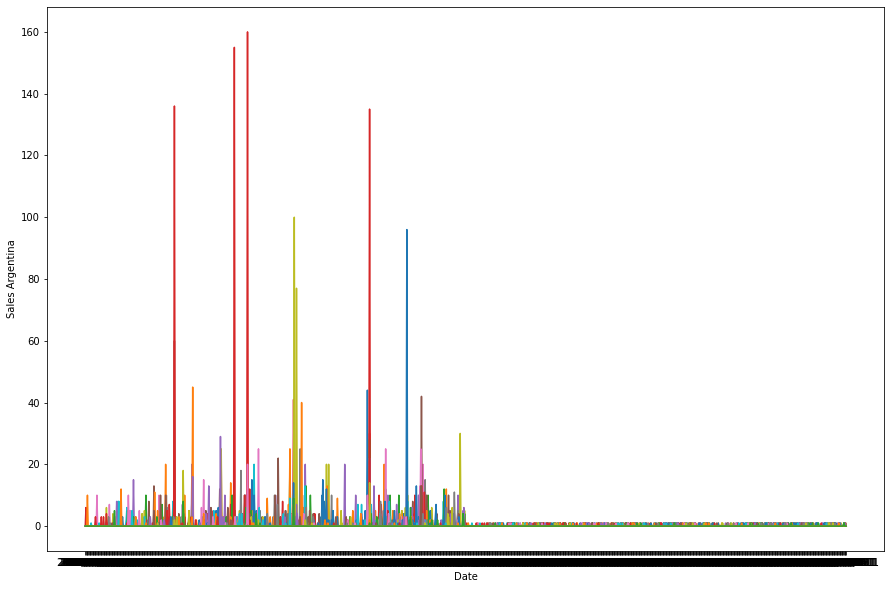

In [51]:
plt.xlabel('Date')
plt.ylabel('Sales Argentina')
plt.plot(Argentina_ol_only.T)

El experto de negocio nos inidica que a partir de septiembre 2018 hubo un cambio de versión y aumento precio

In [134]:
Argentina_ol_only.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502
2018/07/02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018/07/06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
Argentina_ol_only.T.tail(700)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502
2019/08/12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019/08/13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019/08/14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019/08/15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019/08/16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/02/25.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020/02/26.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020/02/27.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020/02/28.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No parece haber efecto de fin de año...

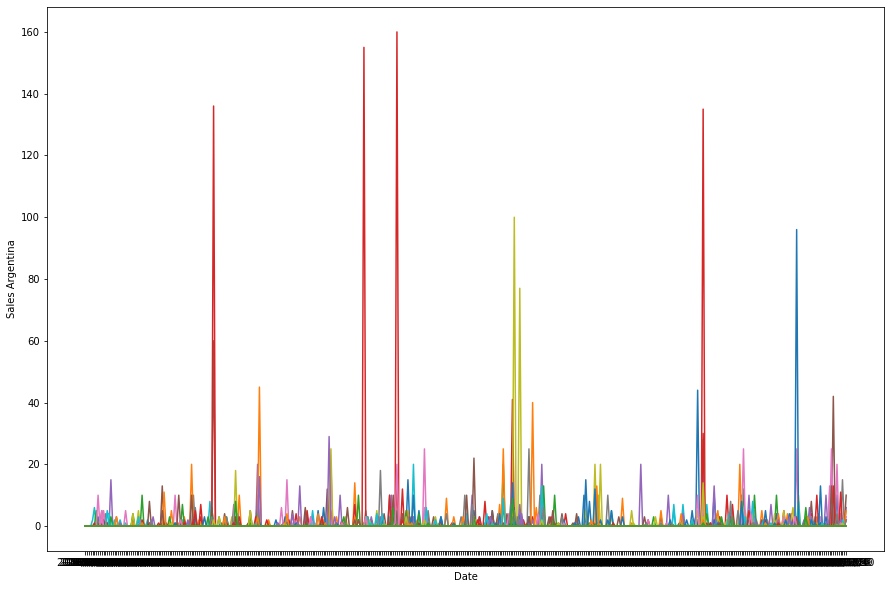

In [184]:
plt.xlabel('Date')
plt.ylabel('Sales Argentina')
plt.plot( Argentina_ol_only.T.loc['2018/09/03':'2019/12/30'] )

¿Efecto CORONAVIRUS?

In [0]:
mean_arg = Argentina_ol_only.T.loc['2019/12/30':'2020/02/29.1'].mean()

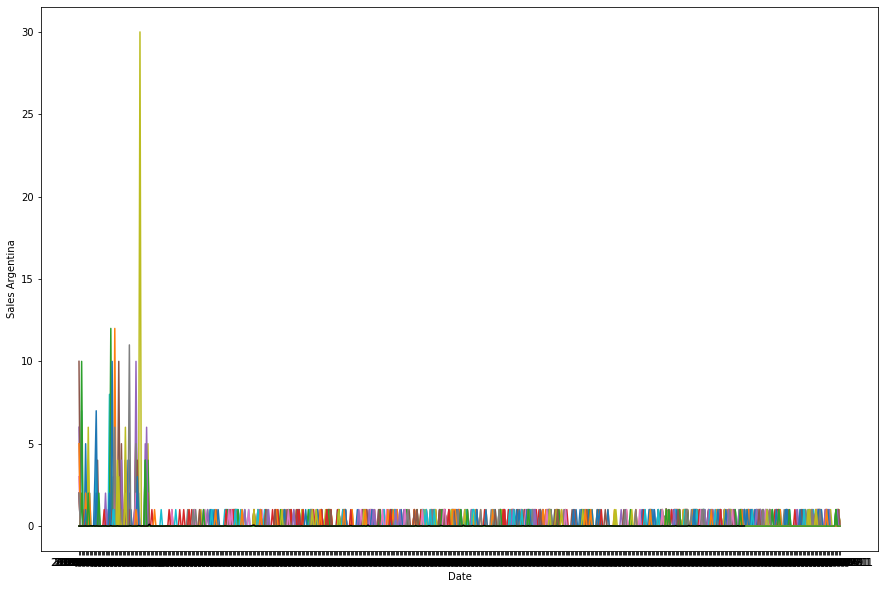

In [94]:
plt.xlabel('Date')
plt.ylabel('Sales Argentina')
plt.plot( Argentina_ol_only.T.loc['2019/12/30':'2020/02/29.1'] )
plt.plot(mean_arg, color="black")

In [0]:
mean = Argentina_ol_only.T.loc['2020/01/02.1':'2020/02/29.1'].mean()

In [1]:
plt.xlabel('Date')
plt.ylabel('Sales Argentina')
plt.plot( Argentina_ol_only.T.loc['2020/01/02.1':'2020/02/29.1'] )
# plt.plot(mean, color="black" ,label='Mean')

NameError: ignored

Extraemos Brazil

In [0]:
Brazil_ol = sales_ol.loc[sales_ol['CTY'] == 'Brazil']

Eliminamos distribuidores y país

In [0]:
Brazil_ol_only = Brazil_ol.drop('CTY', axis=1)
Brazil_ol_only = Brazil_ol_only.drop('RID', axis=1)
Brazil_ol_only = Brazil_ol_only.drop('#UNITS_L12Mo', axis=1)
Brazil_ol_only = Brazil_ol_only.drop('#TRANS_L12Mo', axis=1)

Igualamos las devoluciones a cero

In [0]:
 Brazil_ol_only[Brazil_ol_only < 0] = 0

Graficamos

In [0]:
rcParams['figure.figsize'] = 15,10

 ...]

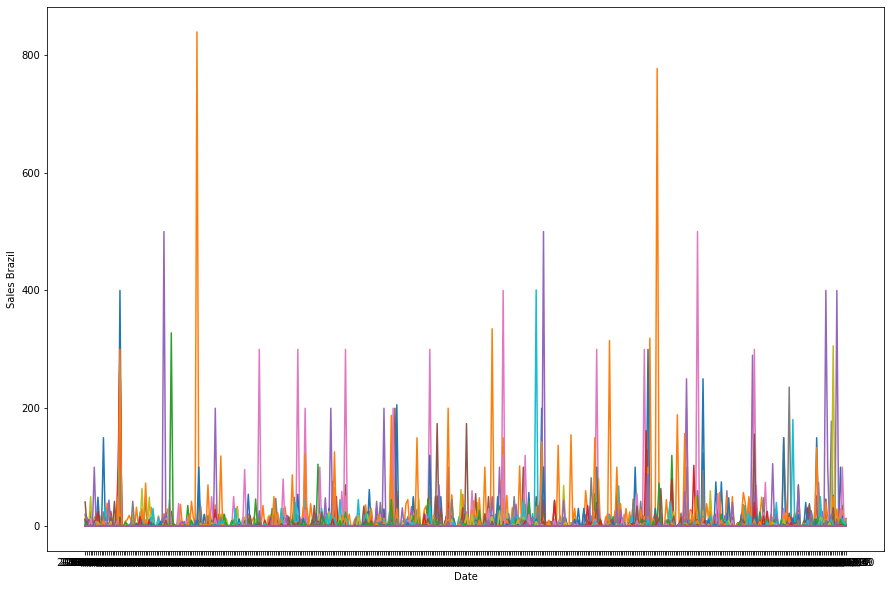

In [23]:
plt.xlabel('Date')
plt.ylabel('Sales Brazil')
plt.plot( Brazil_ol_only.T.loc['2018/09/03':'2019/12/30'] )

 ...]

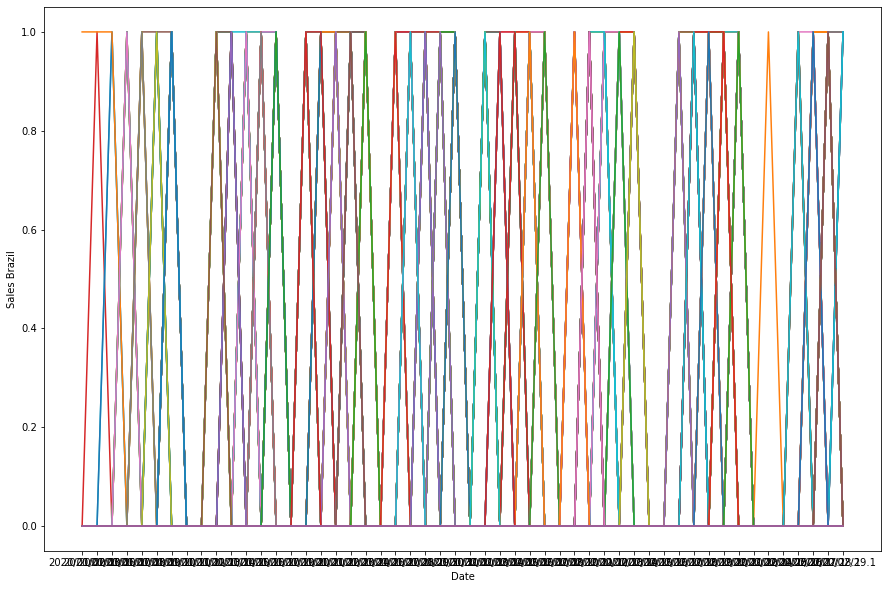

In [25]:
plt.xlabel('Date')
plt.ylabel('Sales Brazil')
plt.plot( Brazil_ol_only.T.loc['2020/01/02.1':'2020/02/29.1'] )

 ...]

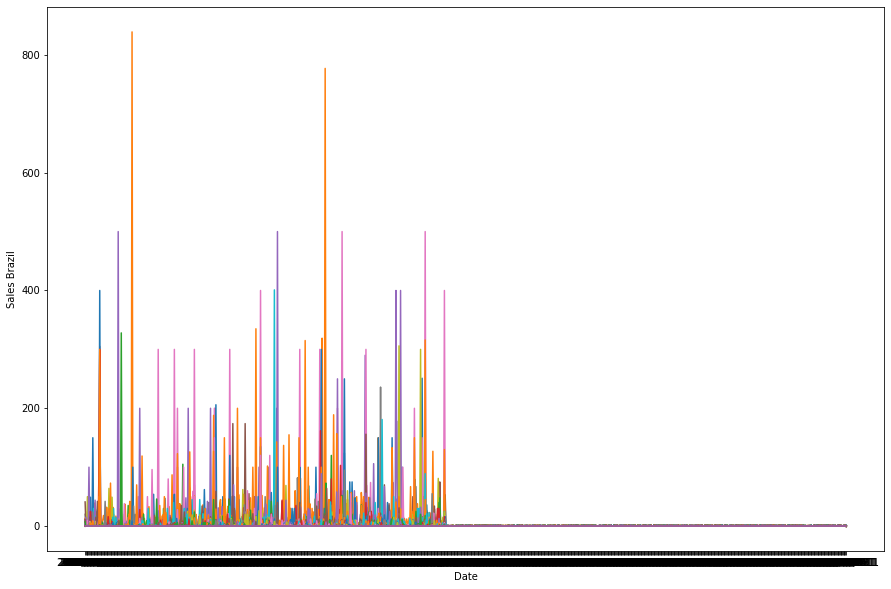

In [27]:
plt.xlabel('Date')
plt.ylabel('Sales Brazil')
plt.plot( Brazil_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )

Extraemos el Caribe

In [0]:
Caribbean_ol = sales_ol.loc[sales_ol['CTY'] == 'Caribbean Region LATAM']

In [0]:
Caribbean_ol_only = Caribbean_ol.drop('CTY', axis=1)
Caribbean_ol_only = Caribbean_ol_only.drop('RID', axis=1)
Caribbean_ol_only = Caribbean_ol_only.drop('#UNITS_L12Mo', axis=1)
Caribbean_ol_only = Caribbean_ol_only.drop('#TRANS_L12Mo', axis=1)

In [0]:
 Caribbean_ol_only[Caribbean_ol_only < 0] = 0

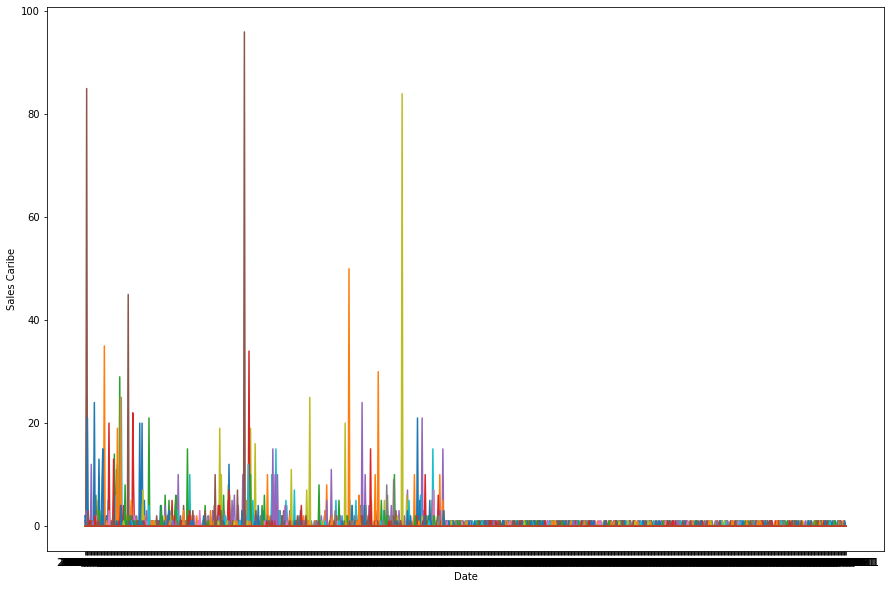

In [204]:
plt.xlabel('Date')
plt.ylabel('Sales Caribe')
plt.plot( Caribbean_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )

Extraemos Latinoamerica Central

In [0]:
Central_ol = sales_ol.loc[sales_ol['CTY'] == 'Central Region LATAM']

In [0]:
Central_ol_only = Central_ol.drop('CTY', axis=1)
Central_ol_only = Central_ol_only.drop('RID', axis=1)
Central_ol_only = Central_ol_only.drop('#UNITS_L12Mo', axis=1)
Central_ol_only = Central_ol_only.drop('#TRANS_L12Mo', axis=1)

In [0]:
Central_ol_only[Central_ol_only < 0] = 0

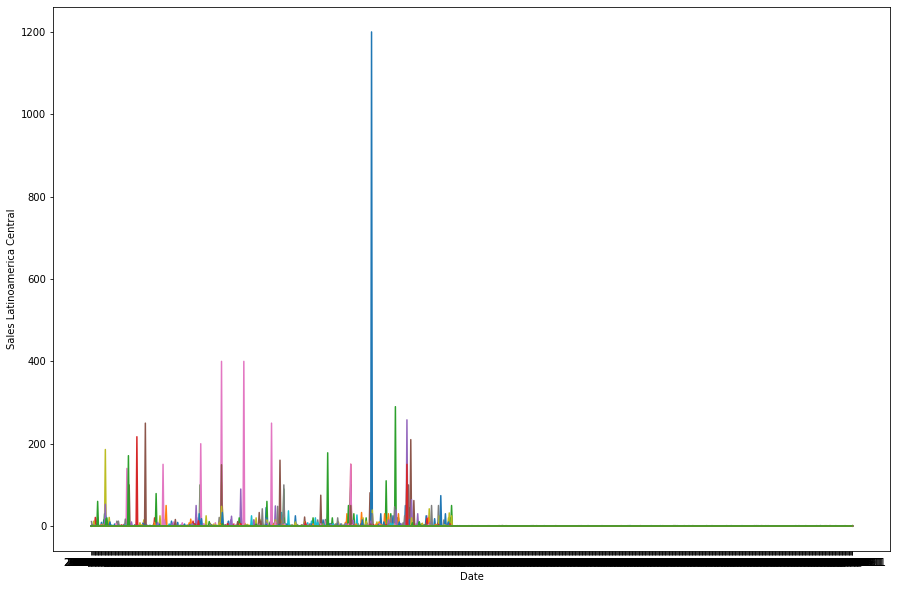

In [222]:
plt.xlabel('Date')
plt.ylabel('Sales Latinoamerica Central')
plt.plot( Central_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )

Extraemos Chile

In [0]:
Chile_ol = sales_ol.loc[sales_ol['CTY'] == 'Chile']

In [0]:
Chile_ol_only = Chile_ol.drop('CTY', axis=1)
Chile_ol_only = Chile_ol_only.drop('RID', axis=1)
Chile_ol_only = Chile_ol_only.drop('#UNITS_L12Mo', axis=1)
Chile_ol_only = Chile_ol_only.drop('#TRANS_L12Mo', axis=1)

In [0]:
Chile_ol_only[Chile_ol_only < 0] = 0

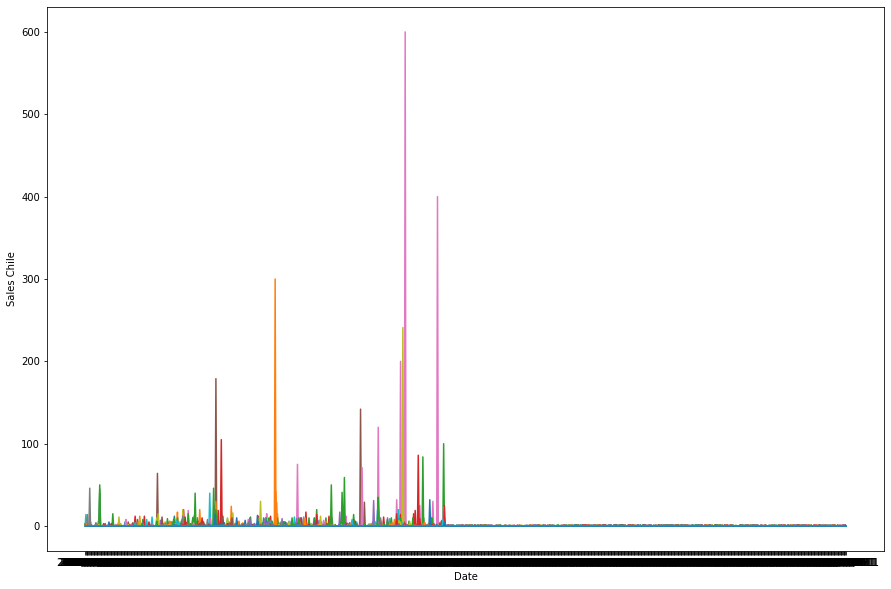

In [223]:
plt.xlabel('Date')
plt.ylabel('Sales Chile')
plt.plot( Chile_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )

In [0]:
Colombia_ol = sales_ol.loc[sales_ol['CTY'] == 'Colombia']

In [0]:
Colombia_ol_only = Colombia_ol.drop('CTY', axis=1)
Colombia_ol_only = Colombia_ol_only.drop('RID', axis=1)
Colombia_ol_only = Colombia_ol_only.drop('#UNITS_L12Mo', axis=1)
Colombia_ol_only = Colombia_ol_only.drop('#TRANS_L12Mo', axis=1)

In [0]:
Colombia_ol_only[Colombia_ol_only < 0] = 0

 ...]

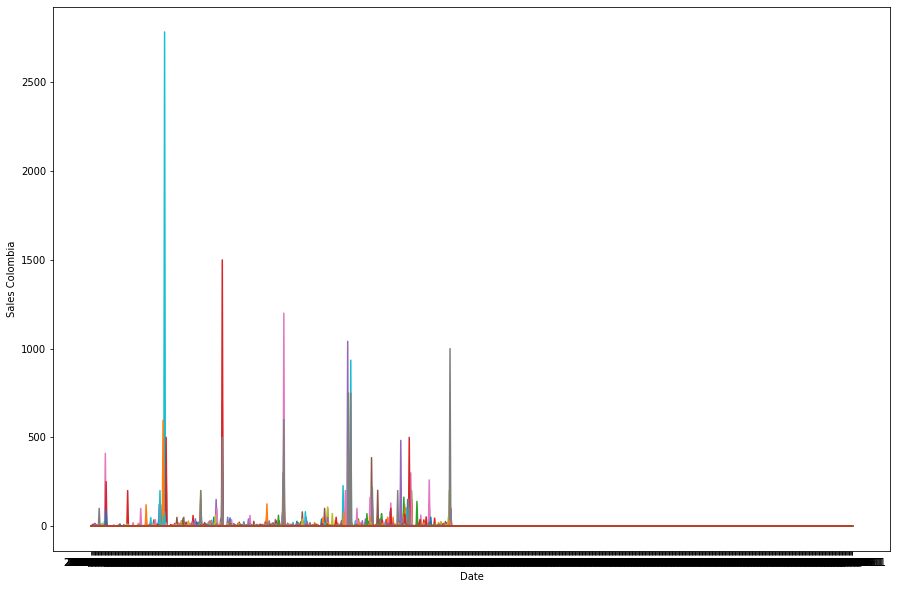

In [224]:
plt.xlabel('Date')
plt.ylabel('Sales Colombia')
plt.plot( Colombia_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )

Extraemos Mexico

In [0]:
Mexico_ol = sales_ol.loc[sales_ol['CTY'] == 'Mexico']

In [0]:
Mexico_ol_only = Mexico_ol.drop('CTY', axis=1)
Mexico_ol_only = Mexico_ol_only.drop('RID', axis=1)
Mexico_ol_only = Mexico_ol_only.drop('#UNITS_L12Mo', axis=1)
Mexico_ol_only = Mexico_ol_only.drop('#TRANS_L12Mo', axis=1)

In [0]:
Mexico_ol_only[Mexico_ol_only < 0] = 0

 ...]

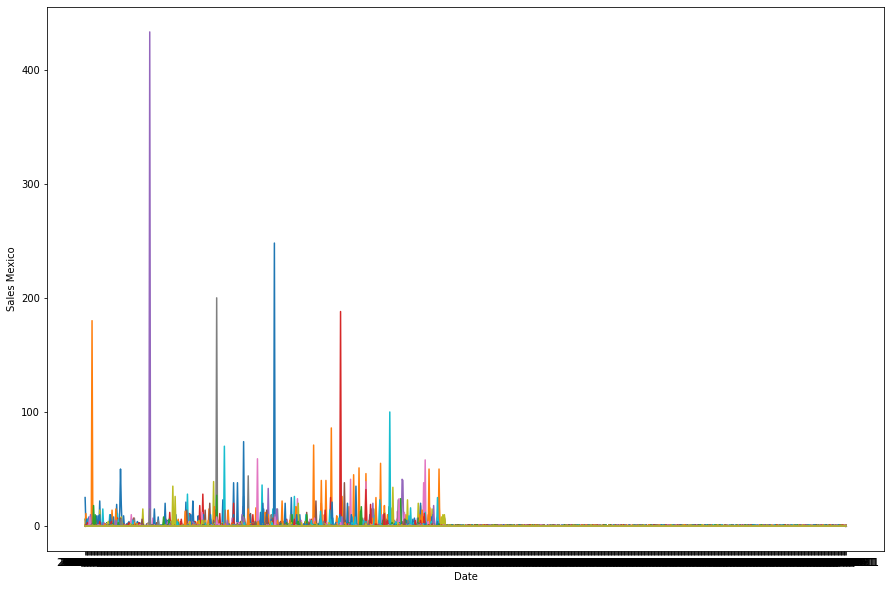

In [228]:
plt.xlabel('Date')
plt.ylabel('Sales Mexico')
plt.plot( Mexico_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )

Extraemos LATAM Sur

In [0]:
South_ol = sales_ol.loc[sales_ol['CTY'] == 'South Region LATAM']

In [0]:
South_ol_only = South_ol.drop('CTY', axis=1)
South_ol_only = South_ol_only.drop('RID', axis=1)
South_ol_only = South_ol_only.drop('#UNITS_L12Mo', axis=1)
South_ol_only = South_ol_only.drop('#TRANS_L12Mo', axis=1)

In [0]:
South_ol_only[South_ol_only < 0] = 0

 ...]

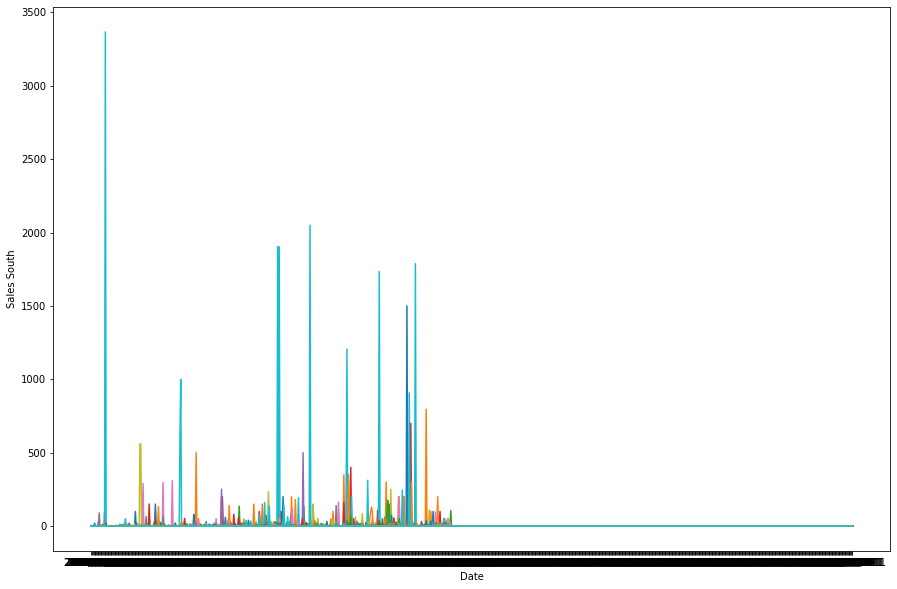

In [233]:
plt.xlabel('Date')
plt.ylabel('Sales South')
plt.plot( South_ol_only.T.loc['2018/09/03':'2020/02/29.1'] )